In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [6]:
def extreme_internal_allregions(args):
    regions = [USeast,USwest,iceland,europe,australia,tropics]
    dss = []
    for r in regions:
        internal = r.extreme_internal_variability(**args)
        internal = internal.expand_dims('region')
        dss.append(internal)
    regions = ['USeast','USwest','iceland','europe','australia','tropics']
    final_dataset = xr.concat(dss,dim='region')
    final_dataset = final_dataset.assign_coords({'region':regions})
    return final_dataset

In [48]:
# settings 
#for mean temp
# variable = 'tas'
# variable = 'tasmin'
variable = 'tasmin'
models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR','EC-Earth3'] 


#for precip - still having issues getting EC-Earth data 
# variable = 'pr'
# models = ['CanESM5','cesm_lens','MIROC6','MPI-ESM1-2-LR'] 

In [49]:
USeast = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_41.3_287.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_41.3_287.5.zarr


In [50]:
USwest = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=37.7, lon=-122.4,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_37.7_237.6.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_37.7_237.6.zarr


In [51]:
iceland = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=65, lon=-19,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_65_341.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_65_341.zarr


In [52]:
europe = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=51,lon=10.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_51_10.5.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_51_10.5.zarr


In [53]:
australia = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=-25.2,lon=133.7,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_-25.2_133.7.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_-25.2_133

In [54]:
tropics = MultiModelLargeEnsemble(models=models,
                                 variable=variable, granularity='day', lat=3.9,lon=-53.1,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_hist_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/CanESM5_day_future_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_hist_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/cesm_lens_day_future_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_hist_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MIROC6_day_future_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_hist_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/MPI-ESM1-2-LR_day_future_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_hist_tasmin_3.9_306.9.zarr
gcs://climateai_data_repository/tmp/internal_variability/EC-Earth3_day_future_tasmin_3.9_306.9.zarr


In [55]:
# internal_tasmin = extreme_internal_allregions(args = {'return_period':10,
#                                     'coarsen':1,
#                                     'conseq_days':1,
#                                     'rolling_average':10,
#                                     'hist_slice':slice('1995','2014'),
#                                     'postprocess':True
#                                     }
#                            )

In [27]:
# internal_tasmax = extreme_internal_allregions(args = {'return_period':10,
#                                     'coarsen':1,
#                                     'conseq_days':1,
#                                     'rolling_average':10,
#                                     'hist_slice':slice('1995','2014'),
#                                     'postprocess':True
#                                     }
#                            )

In [19]:
# internal_tas = extreme_internal_allregions(args = {'return_period':10,
#                                     'coarsen':1,
#                                     'conseq_days':1,
#                                     'rolling_average':10,
#                                     'hist_slice':slice('1995','2014'),
#                                     'postprocess':True
#                                     }
#                            )

In [28]:
internal_tas

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9997
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/16)
    tas_occurance      (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_mean_le   (region, time) float64 nan nan nan nan ... nan nan nan
    internal_var_le    (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_var_fit   (region) float64 1.385e-10 1.972e-10 ... 2.595e-08
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

In [29]:
internal_tasmax

<xarray.Dataset>
Dimensions:            (time: 86, member: 58, model: 5, region: 6)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (model, member) object 'r16i1p2f1' ... 'r3i1p1f1'
  * model              (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile           float64 0.9997
  * region             (region) <U9 'USeast' 'USwest' ... 'australia' 'tropics'
Data variables: (12/16)
    tasmax_occurance   (region, model, member, time) float64 nan nan ... nan nan
    model_le           (region, time) float64 nan nan nan nan ... nan nan nan
    internal_mean_le   (region, time) float64 nan nan nan nan ... nan nan nan
    internal_var_le    (region, time) float64 nan nan nan nan ... nan nan nan
    total_le           (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_le    (region, time) float64 nan nan nan nan ... nan nan nan
    ...                 ...
    internal_var_fit   (region) float64 7.896e-11 2.63e-11 ... 9.102e-10
    model_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    total_fit          (region, time) float64 nan nan nan nan ... nan nan nan
    internal_fit_frac  (region, time) float64 nan nan nan nan ... nan nan nan
    model_fit_frac     (region, time) float64 nan nan nan nan ... nan nan nan
    total_direct_fit   (region, time) float64 nan nan nan nan ... nan nan nan

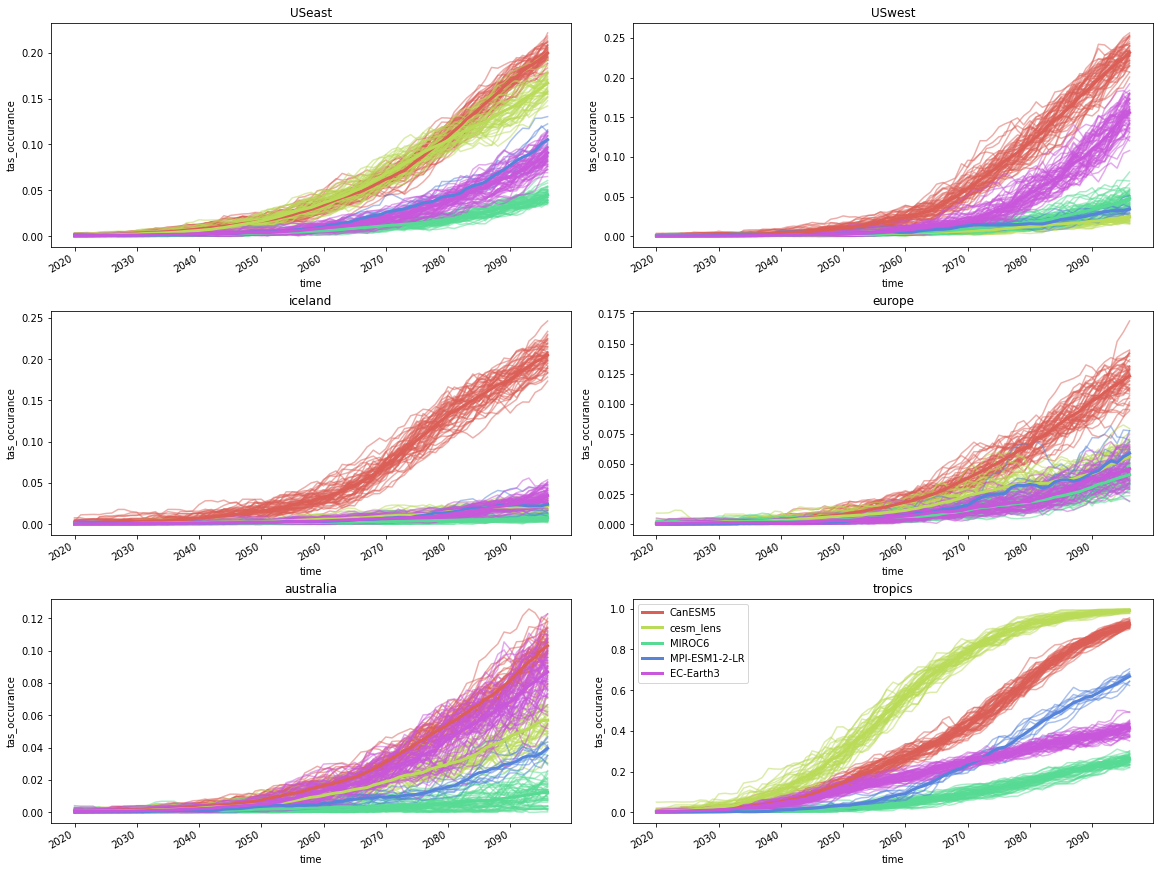

In [31]:
variable='tas'
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal_tas[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_tas[variable+'_occurance'].model):
        m = internal_tas.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

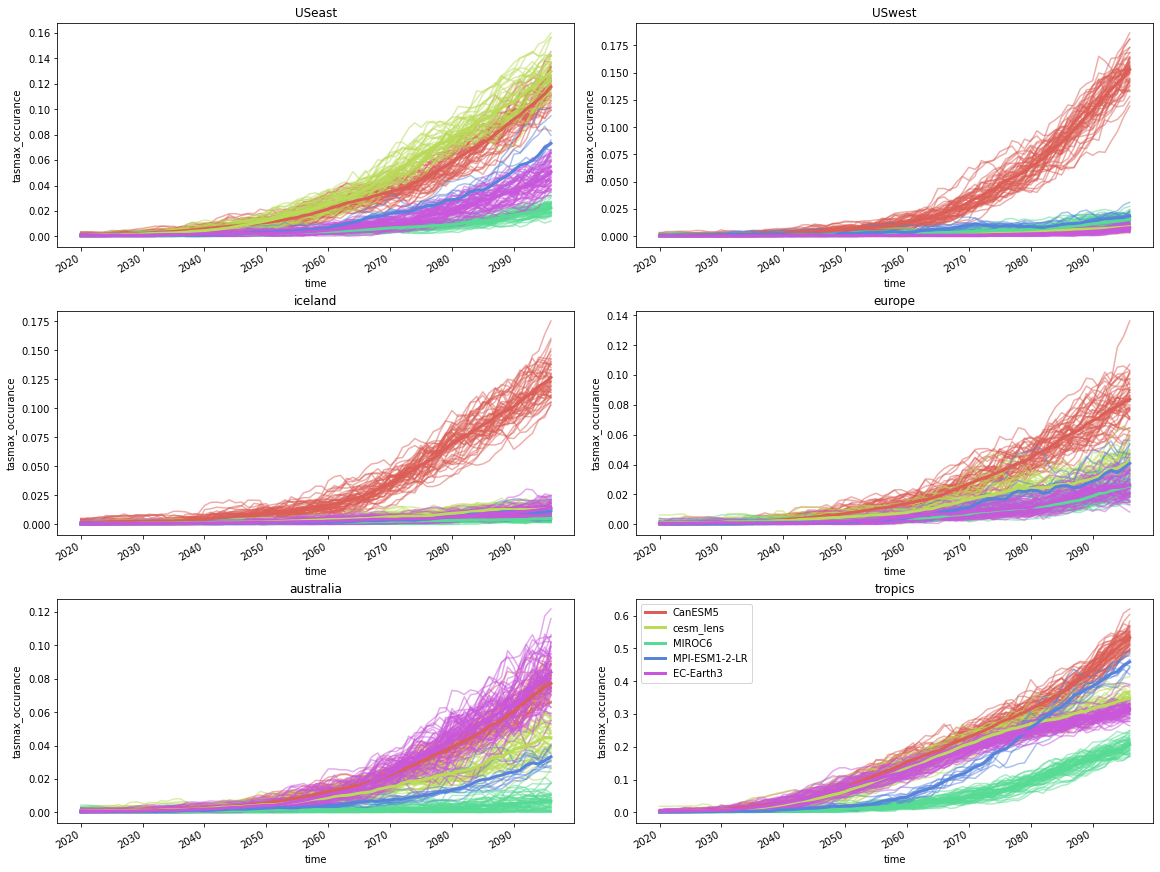

In [32]:
variable='tasmax'
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal_tasmax[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_tasmax[variable+'_occurance'].model):
        m = internal_tasmax.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

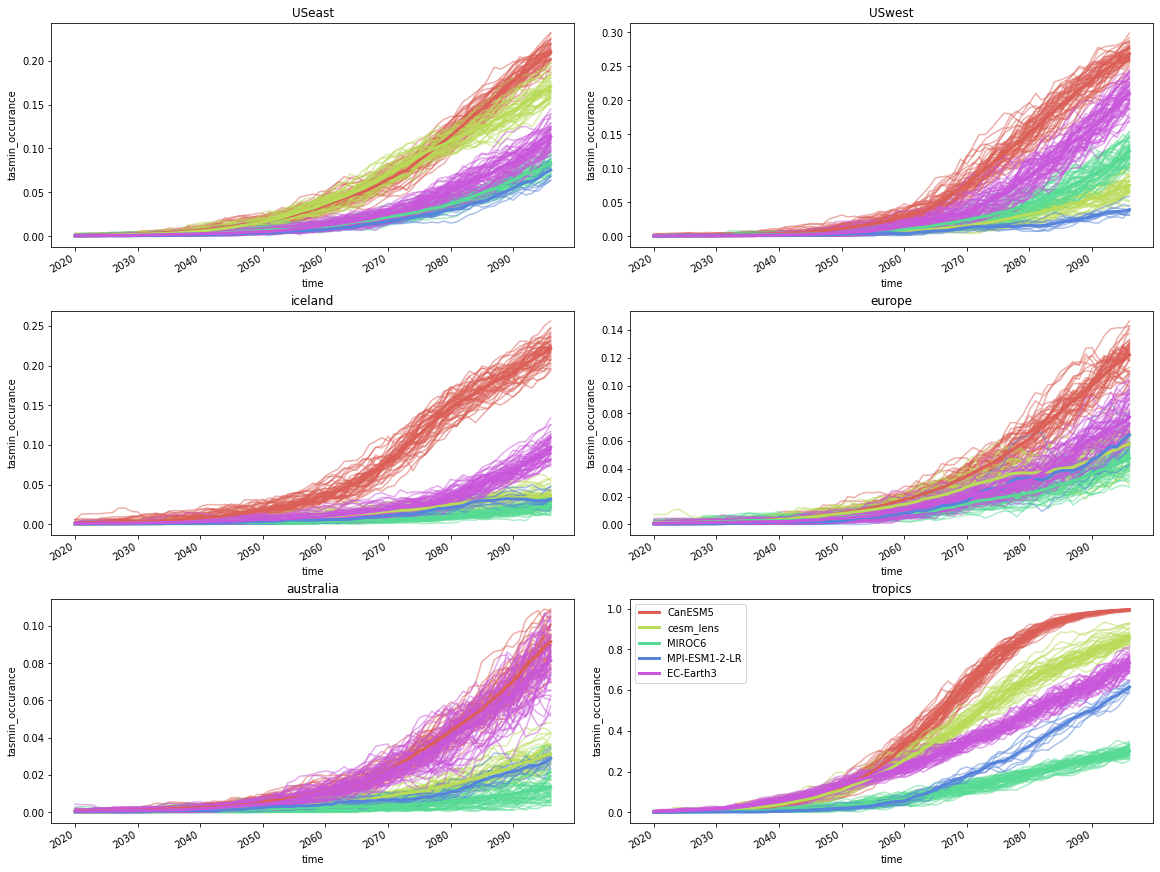

In [56]:
variable='tasmin'
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16, 12),constrained_layout=True)
colors = sns.color_palette("hls", len(internal_tasmin[variable+'_occurance'].model))
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USeast','USwest','iceland','europe','australia','tropics']

for axe,r in zip(axes,regions):
    for i, model in enumerate(internal_tasmin[variable+'_occurance'].model):
        m = internal_tasmin.sel(region=r)[variable+'_occurance'].sel(model=model)
        m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5, ax=axe)
        m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10, ax=axe)
        axe.set_title(r)
plt.legend()

Text(0, 0.5, 'Model (Deg C)')

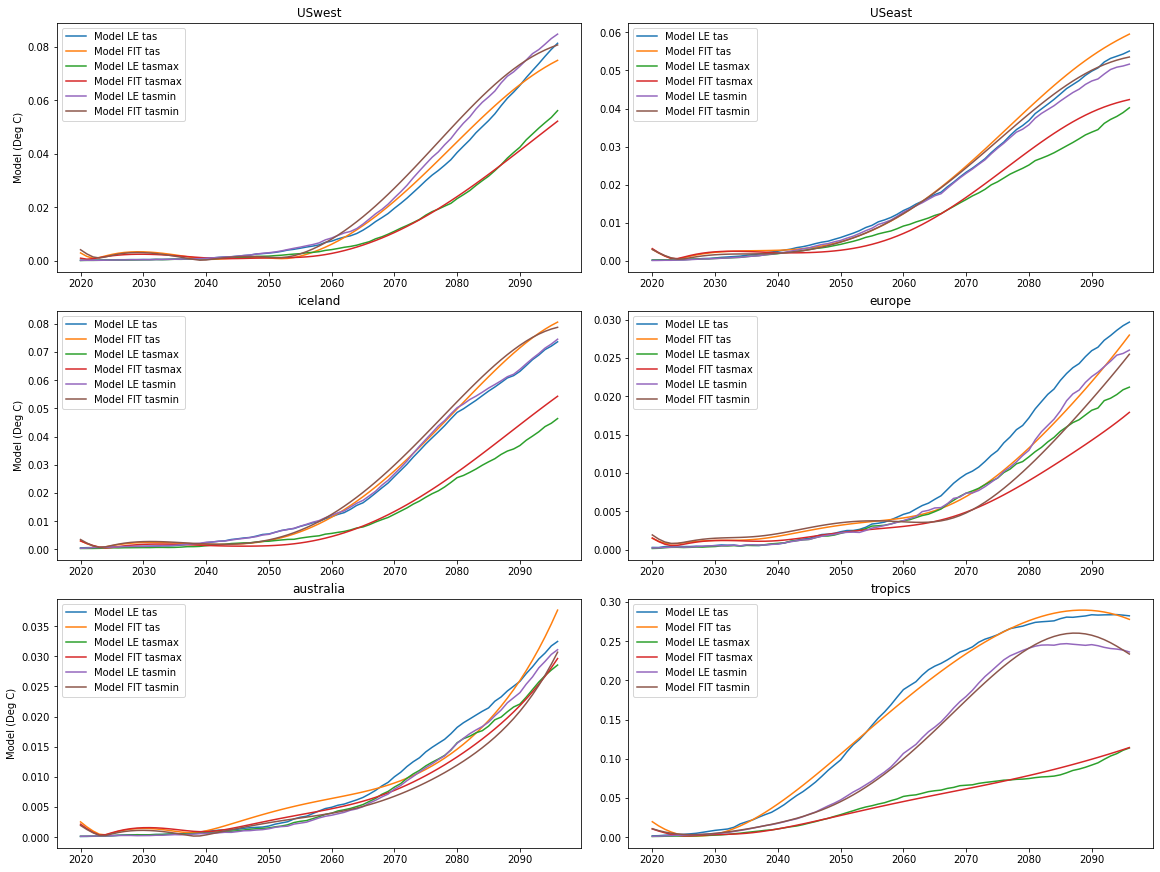

In [57]:
# plot model uncertainty 
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).model_le),
              label='Model LE tas')
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).model_fit),
              label='Model FIT tas')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).model_le),
              label='Model LE tasmax')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).model_fit),
              label='Model FIT tasmax')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).model_le),
              label='Model LE tasmin')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).model_fit),
              label='Model FIT tasmin')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Model (Deg C)')
ax[1,0].set_ylabel('Model (Deg C)')
ax[2,0].set_ylabel('Model (Deg C)')

Text(0, 0.5, 'Total Uncertainty')

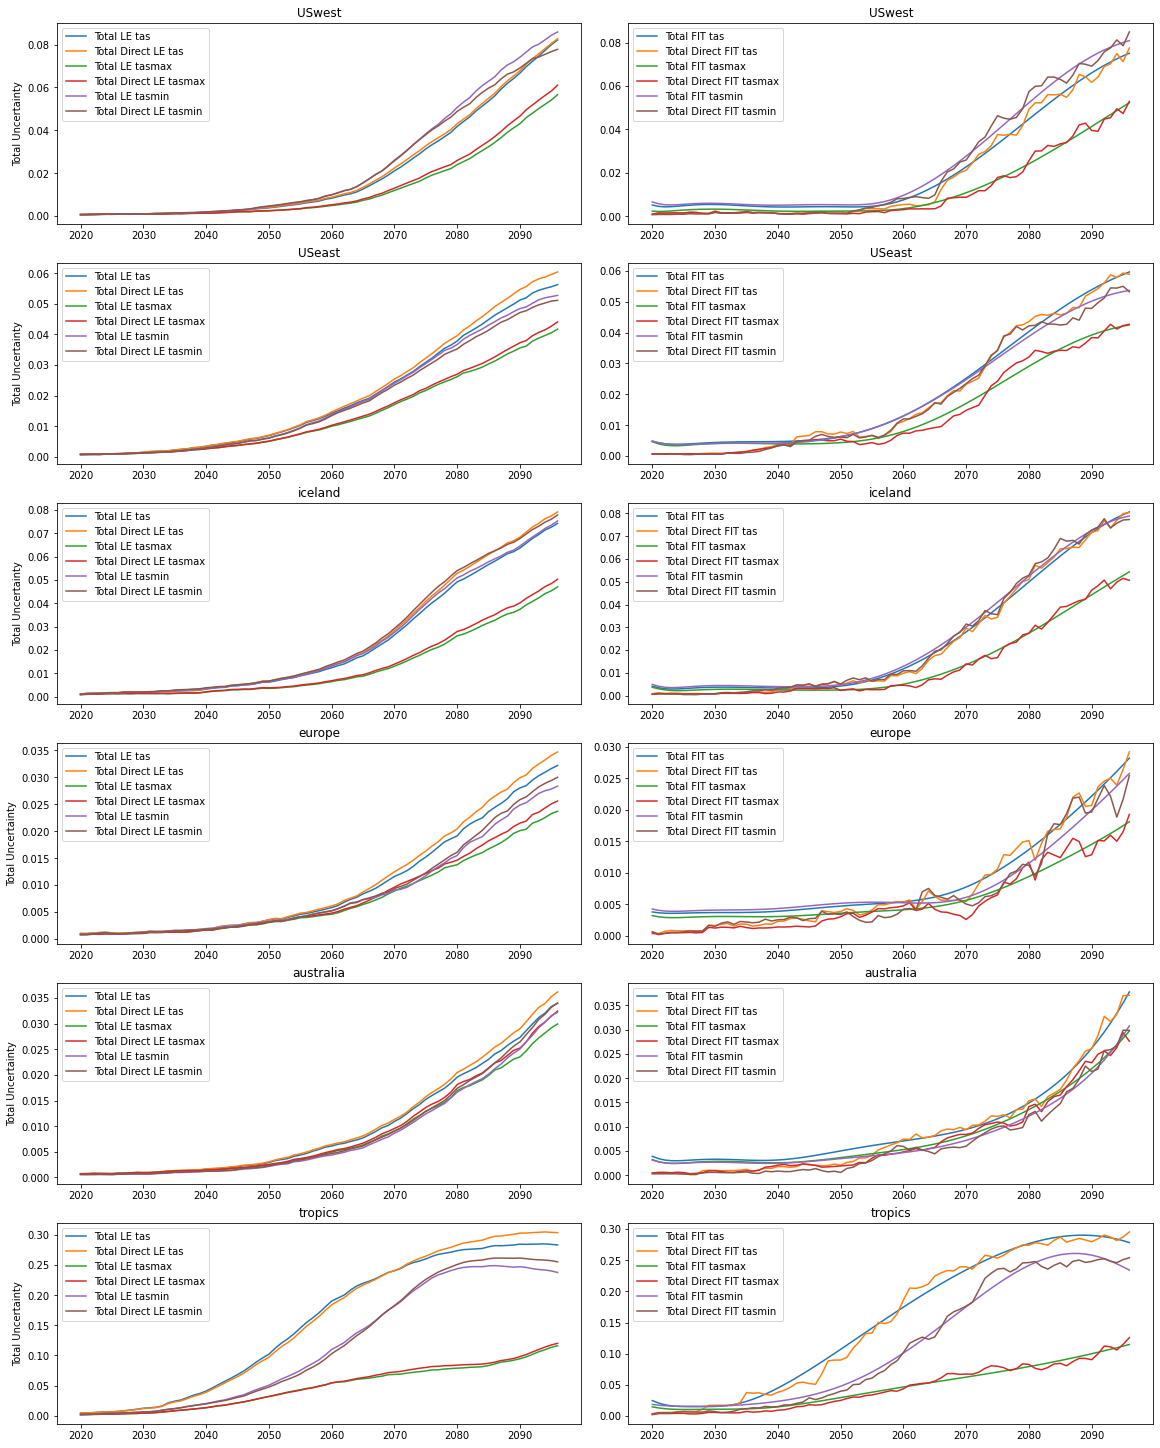

In [58]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
regions = ['USwest','USeast','iceland','europe','australia','tropics']
for axis,region in zip(axes,regions):
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).total_le),
              label='Total LE tas')
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).total_direct_le),
              label='Total Direct LE tas')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).total_le),
              label='Total LE tasmax')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).total_direct_le),
              label='Total Direct LE tasmax')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).total_le),
              label='Total LE tasmin')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).total_direct_le),
              label='Total Direct LE tasmin')
    axis.legend()
    axis.set_title(region)
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).total_fit),
              label='Total FIT tas')
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).total_direct_fit),
              label='Total Direct FIT tas')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).total_fit),
              label='Total FIT tasmax')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).total_direct_fit),
              label='Total Direct FIT tasmax')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).total_fit),
              label='Total FIT tasmin')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).total_direct_fit),
              label='Total Direct FIT tasmin')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Total Uncertainty')
ax[1,0].set_ylabel('Total Uncertainty')
ax[2,0].set_ylabel('Total Uncertainty')
ax[3,0].set_ylabel('Total Uncertainty')
ax[4,0].set_ylabel('Total Uncertainty')
ax[5,0].set_ylabel('Total Uncertainty')

Text(0, 0.5, 'Internal Variability')

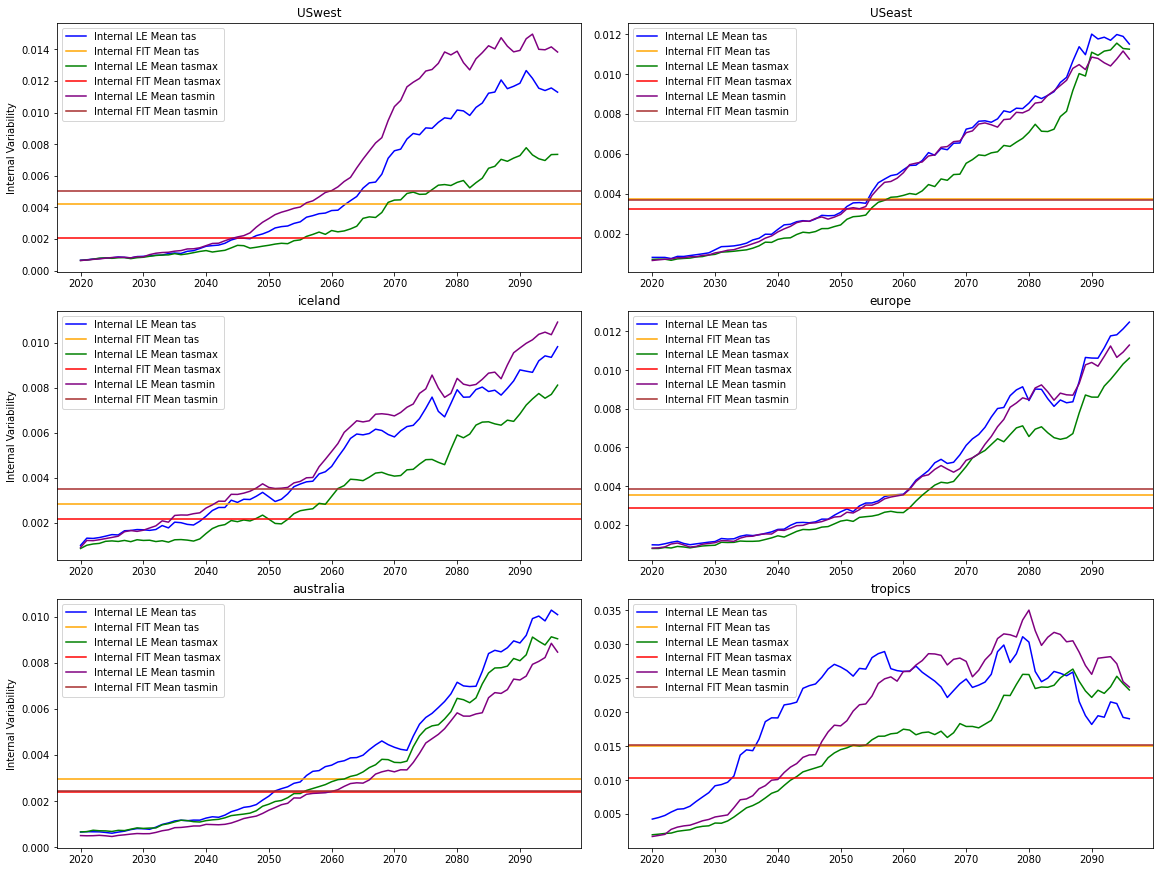

In [61]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for axis,region in zip(axes,regions):
    axis.plot(internal_tas.sel(region=region).time,np.sqrt(internal_tas.sel(region=region).internal_mean_le),
              label='Internal LE Mean tas',color='b')
    axis.axhline(np.sqrt(internal_tas.sel(region=region).internal_mean_fit),
                 label='Internal FIT Mean tas',color='orange')
    axis.plot(internal_tasmax.sel(region=region).time,np.sqrt(internal_tasmax.sel(region=region).internal_mean_le),
              label='Internal LE Mean tasmax',color='g')
    axis.axhline(np.sqrt(internal_tasmax.sel(region=region).internal_mean_fit),
                 label='Internal FIT Mean tasmax',color='r')
    axis.plot(internal_tasmin.sel(region=region).time,np.sqrt(internal_tasmin.sel(region=region).internal_mean_le),
              label='Internal LE Mean tasmin',color='purple')
    axis.axhline(np.sqrt(internal_tasmin.sel(region=region).internal_mean_fit),
                 label='Internal FIT Mean tasmin',color='brown')
    axis.legend()
    axis.set_title(region)
ax[0,0].set_ylabel('Internal Variability')
ax[1,0].set_ylabel('Internal Variability')
ax[2,0].set_ylabel('Internal Variability')

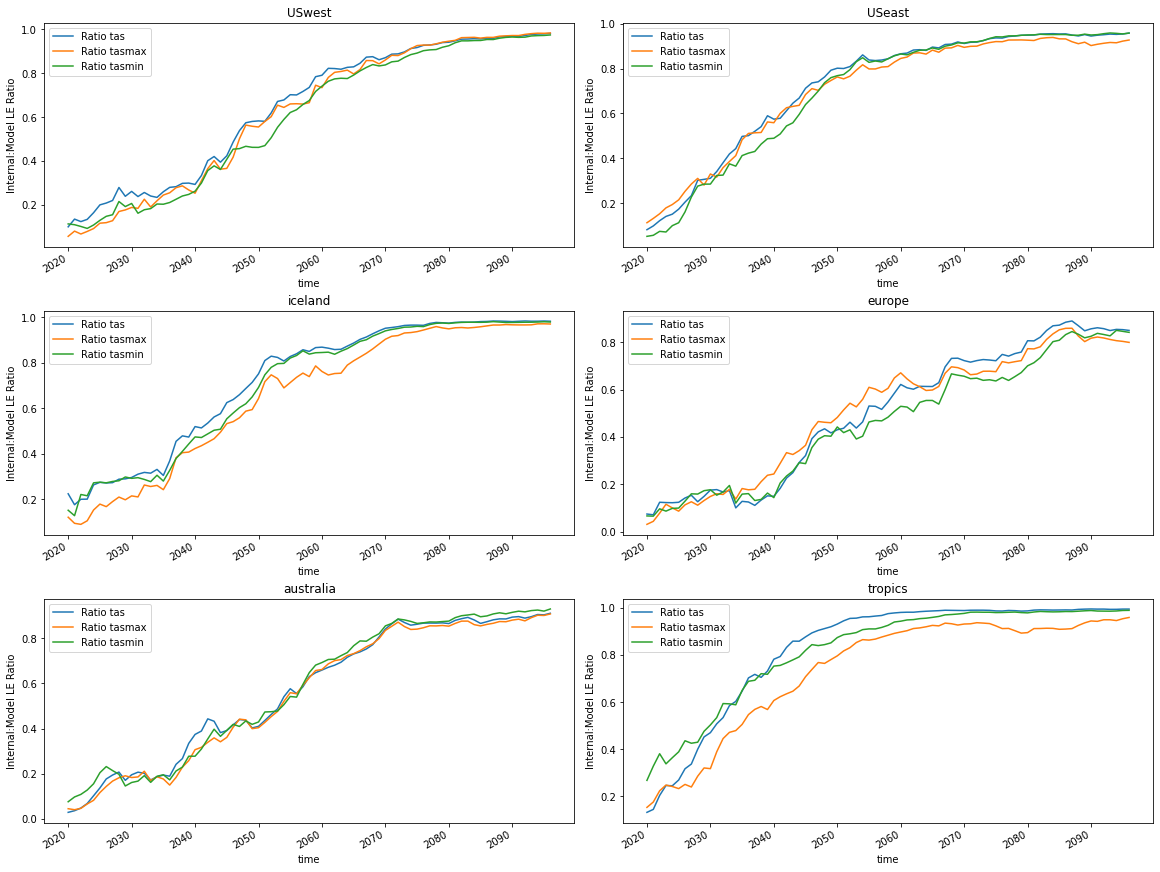

In [62]:
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
for r,axe in zip(regions,axes):
    (internal_tas.sel(region=r).model_le/internal_tas.sel(region=r).total_le).plot(ax=axe,label='Ratio tas')
    (internal_tasmax.sel(region=r).model_le/internal_tasmax.sel(region=r).total_le).plot(ax=axe,label='Ratio tasmax')
    (internal_tasmin.sel(region=r).model_le/internal_tasmin.sel(region=r).total_le).plot(ax=axe,label='Ratio tasmin')
    axe.set_ylabel('Internal:Model LE Ratio')
    axe.set_title(r)
    axe.legend()

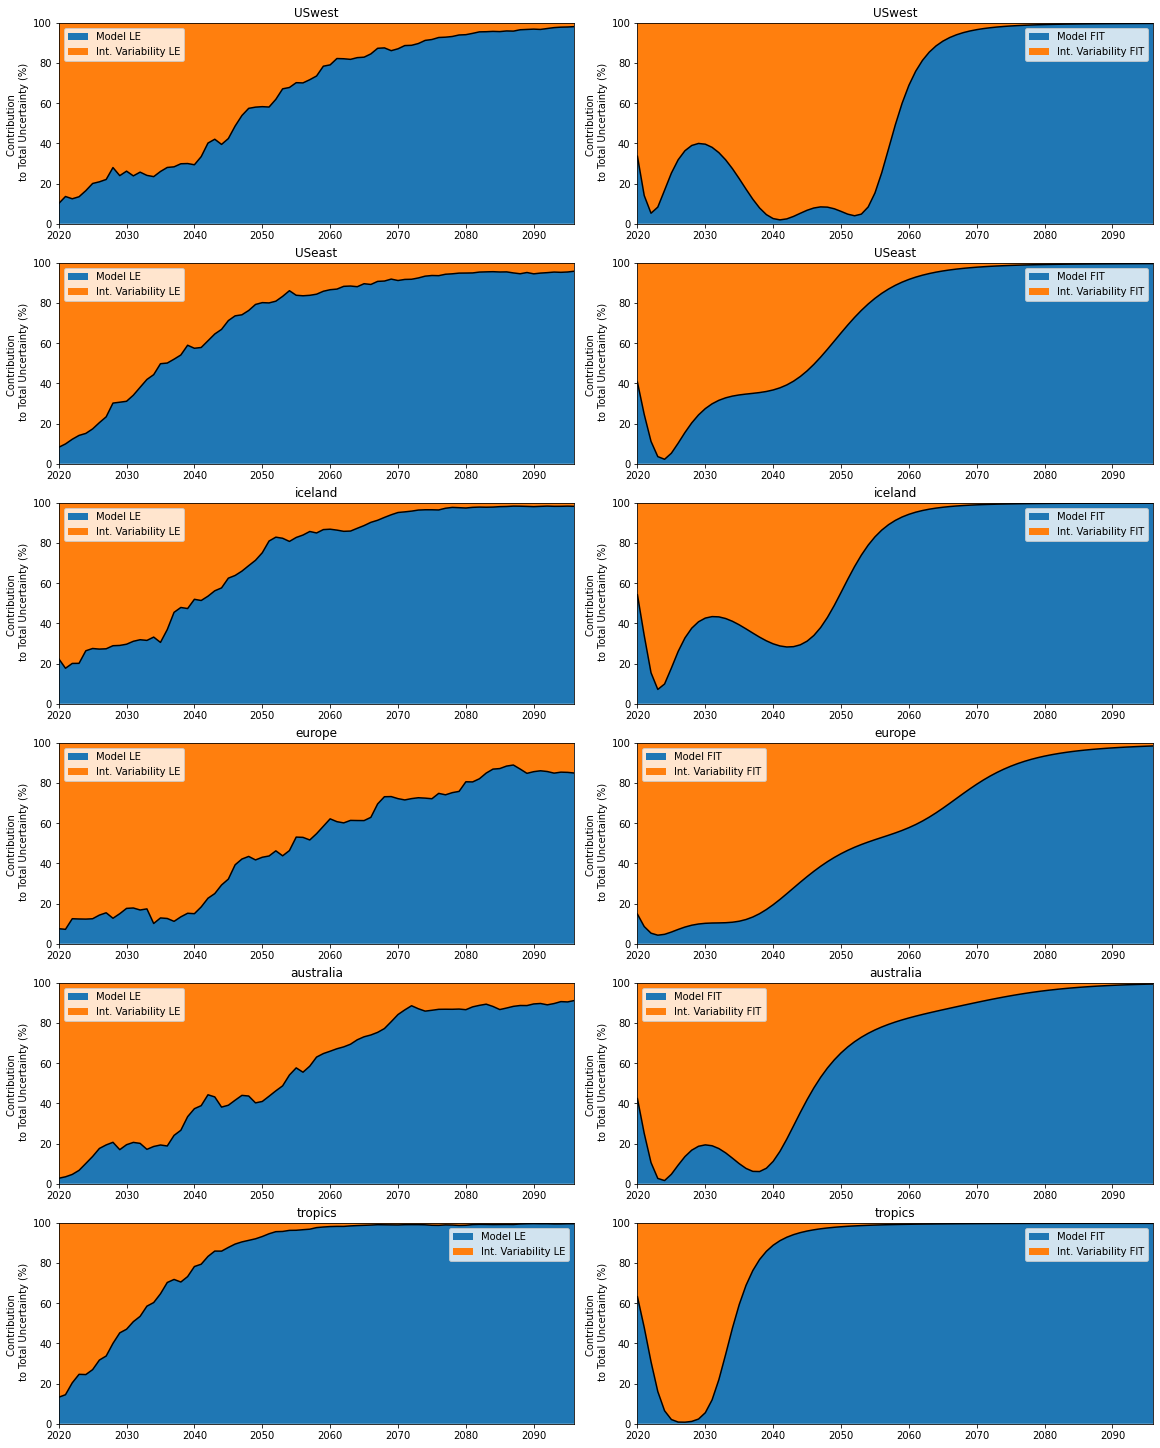

In [42]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_tas.sel(region=region).time
    y=internal_tas.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_tas.sel(region=region).time,internal_tas.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_tas.sel(region=region).time
    y=internal_tas.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_tas.sel(region=region).time,internal_tas.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

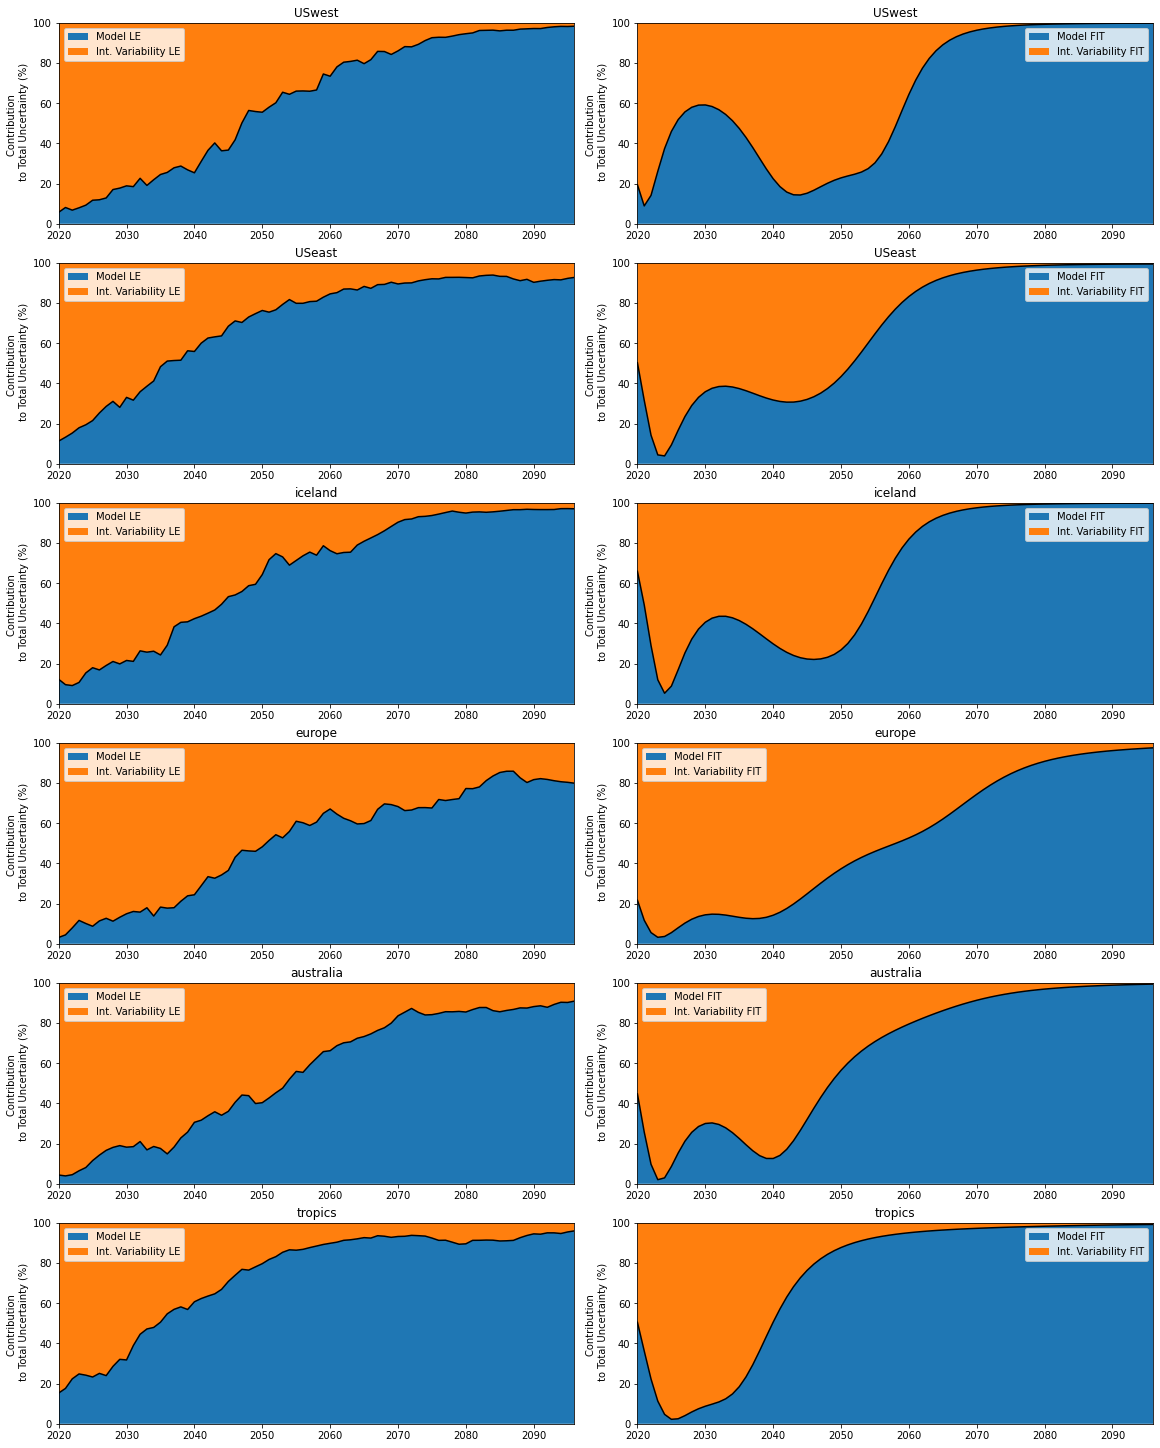

In [43]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_tasmax.sel(region=region).time
    y=internal_tasmax.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_tasmax.sel(region=region).time
    y=internal_tasmax.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

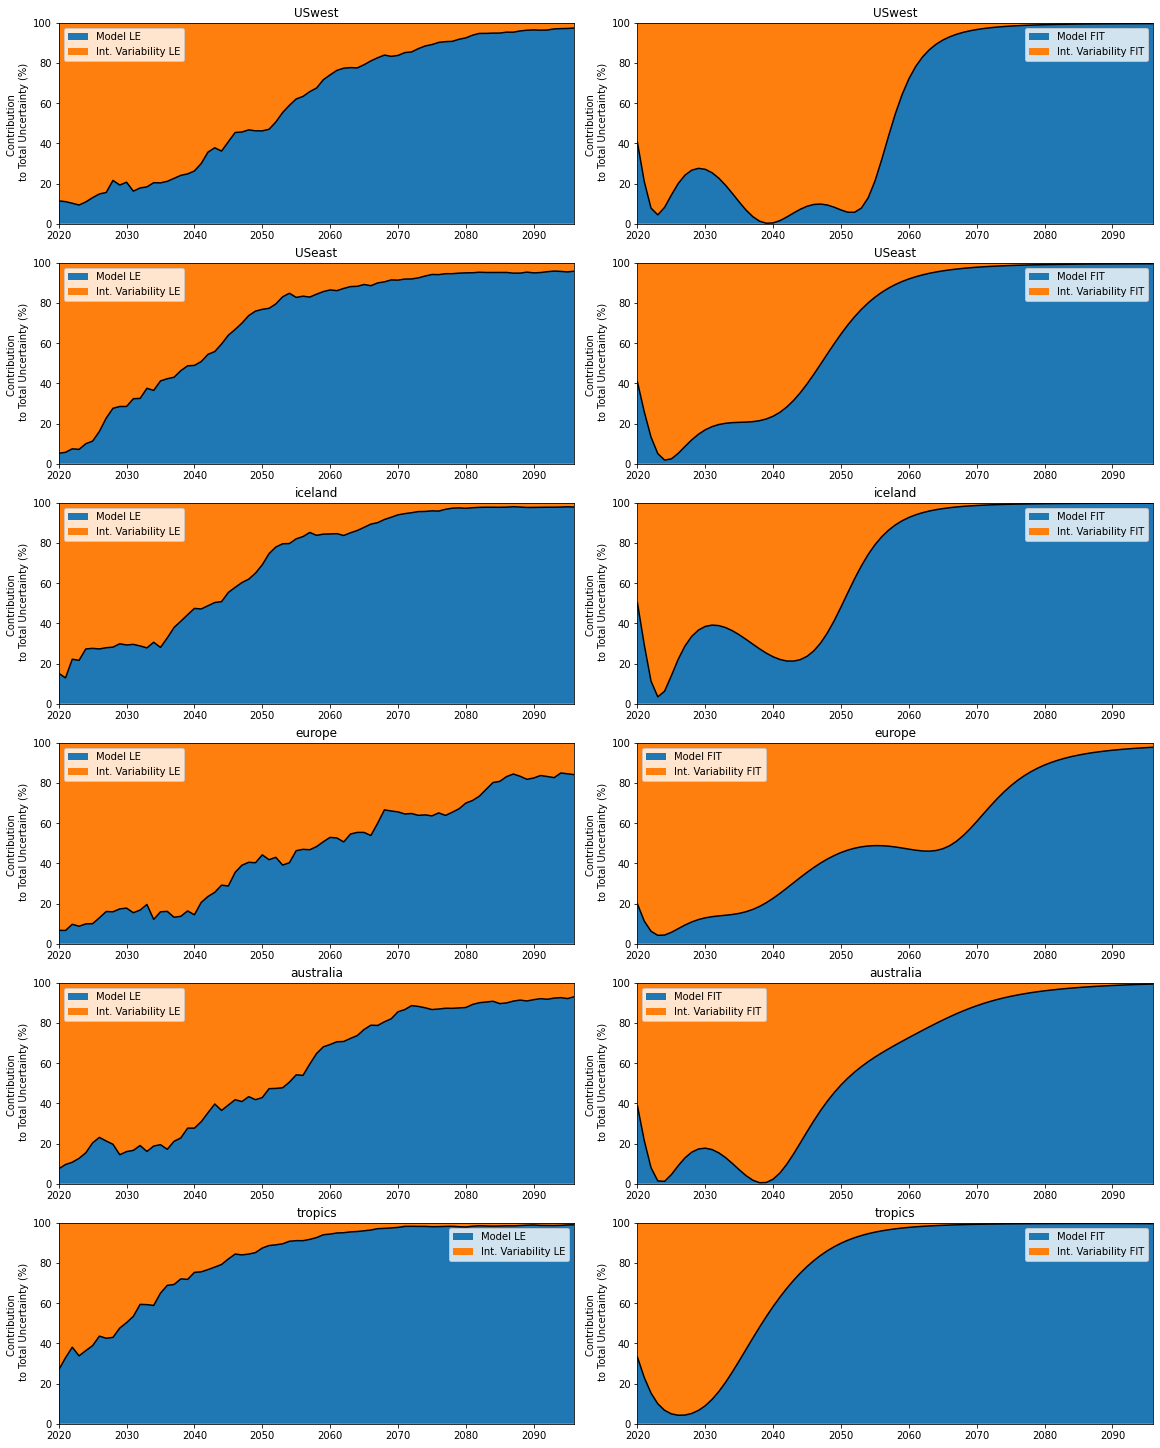

In [63]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
for axis,region in zip(axes,regions):
    x=internal_tasmin.sel(region=region).time
    y=internal_tasmin.sel(region=region).model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin.sel(region=region).model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region in zip(axes,regions):
    x=internal_tasmin.sel(region=region).time
    y=internal_tasmin.sel(region=region).model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin.sel(region=region).model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(region)
    axis.set_xlim(x[5],x[-5])

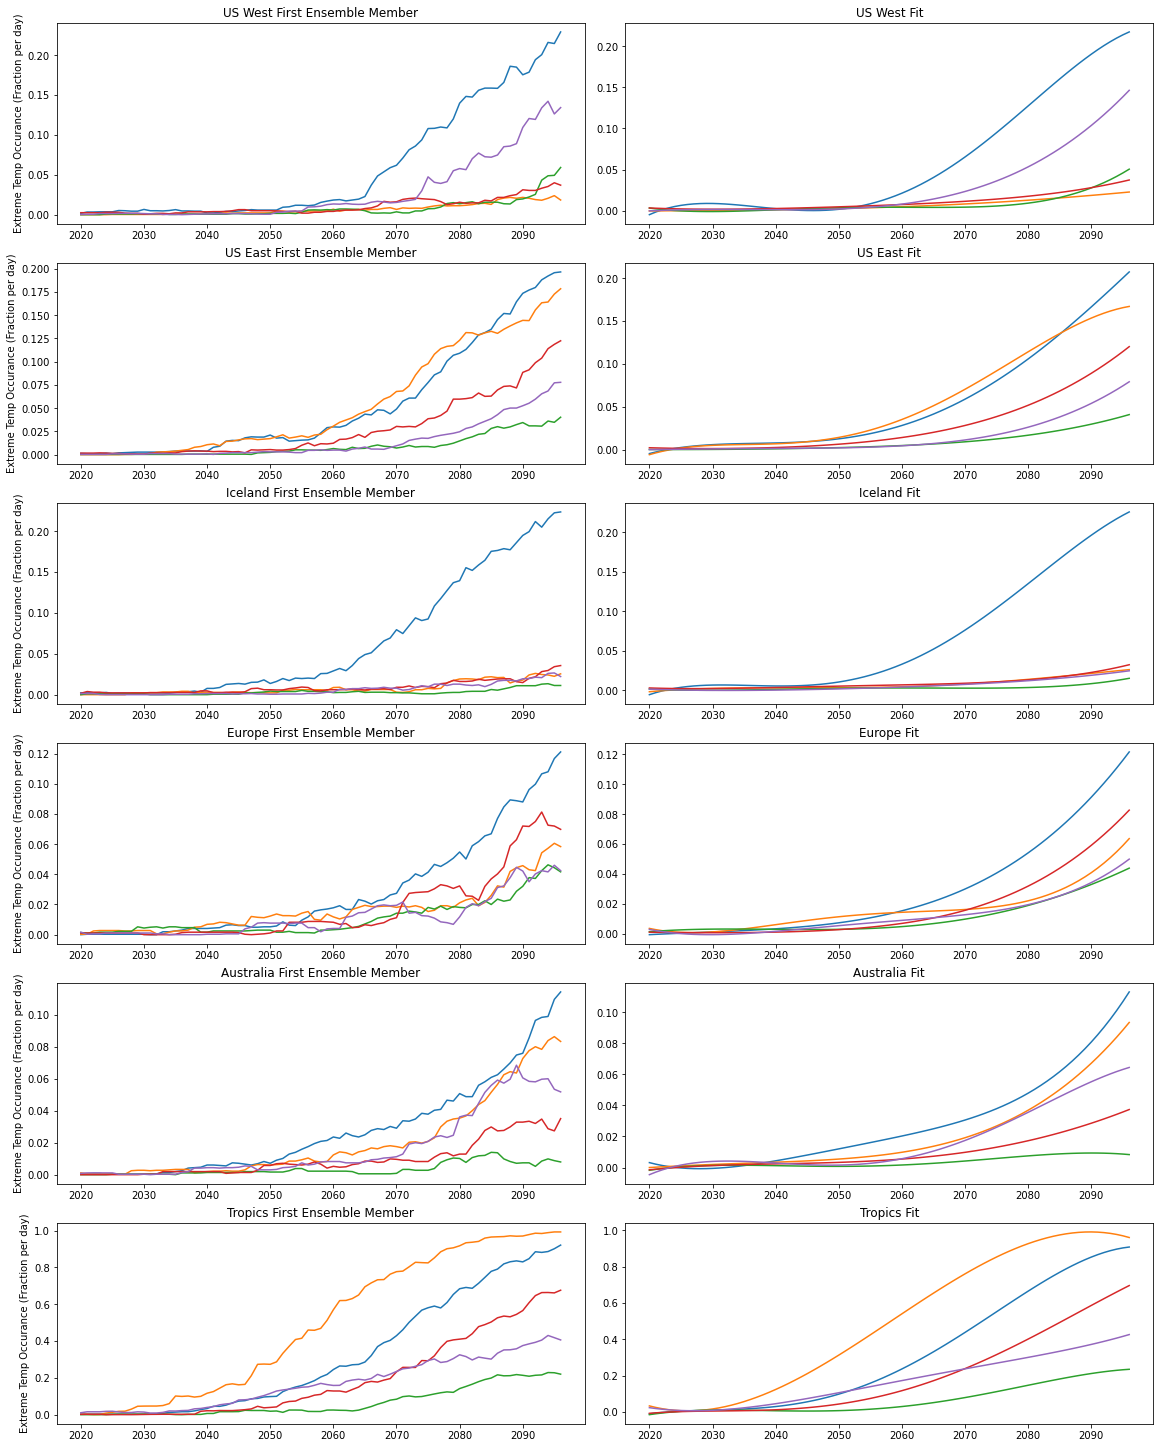

In [44]:
# plot data used for FIT method
variable='tas'
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West First Ensemble Member','US East First Ensemble Member',
          'Iceland First Ensemble Member','Europe First Ensemble Member',
          'Australia First Ensemble Member','Tropics First Ensemble Member']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tas.sel(region=region).time,internal_tas[variable+'_occurance'].sel(region=region).isel(model=m).isel(member=0))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tas.sel(region=region).time,internal_tas.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

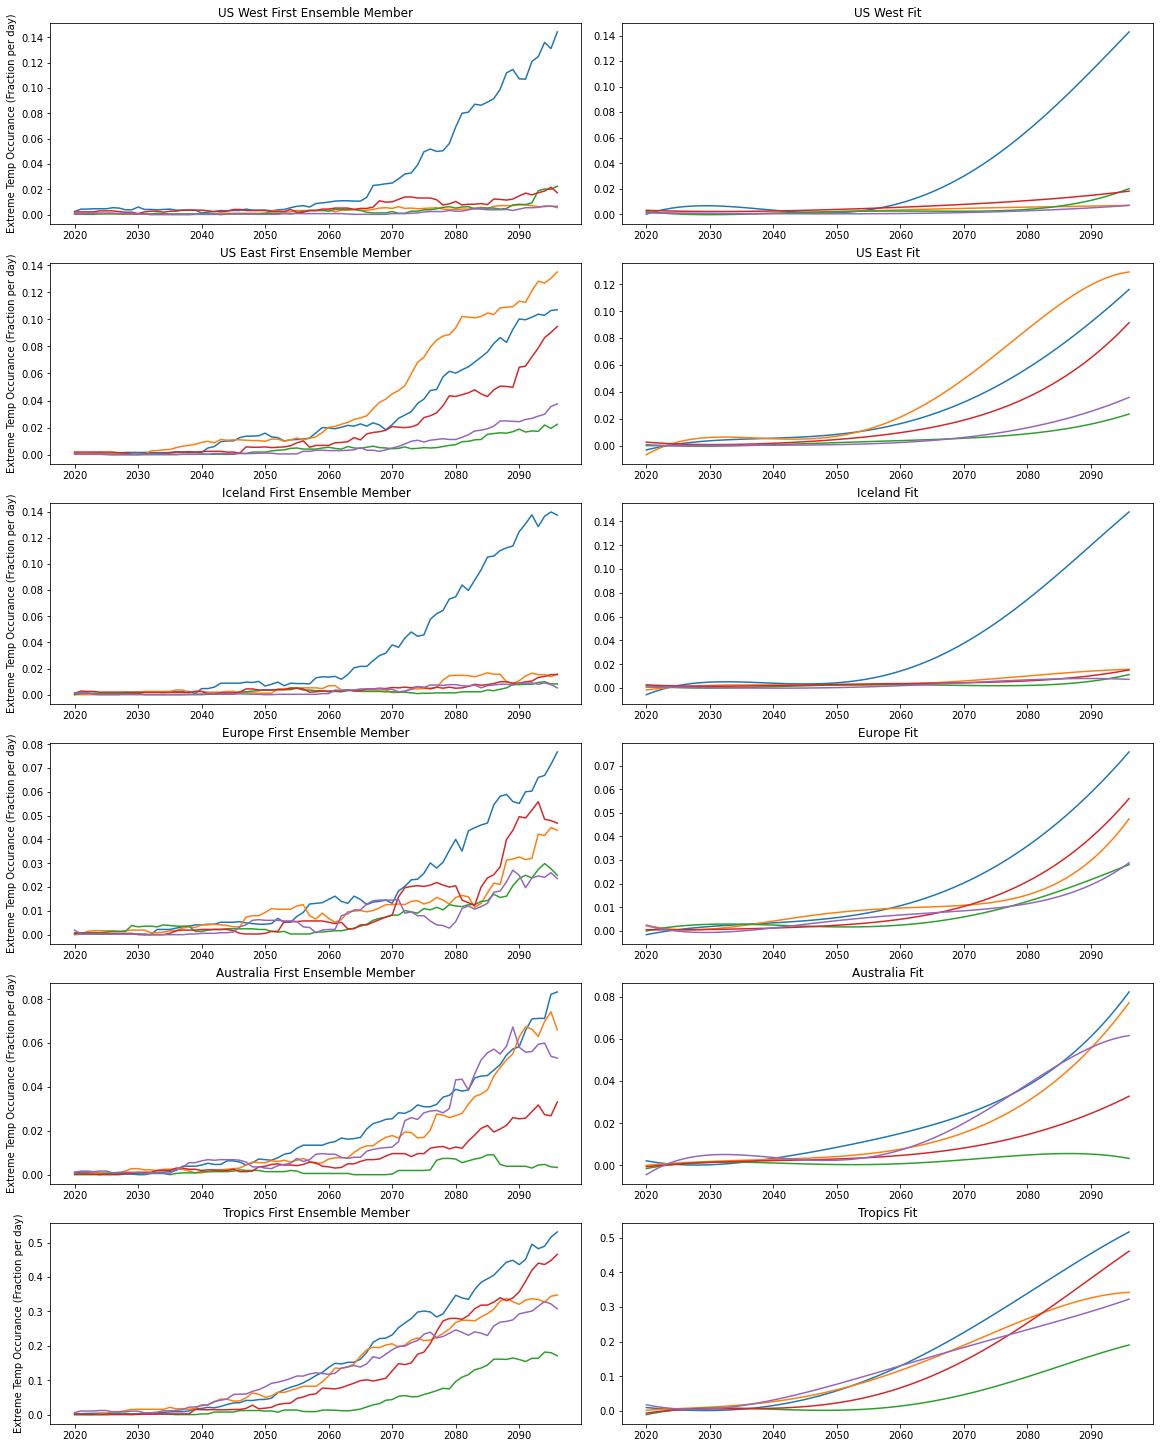

In [45]:
# plot data used for FIT method
variable='tasmax'
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West First Ensemble Member','US East First Ensemble Member',
          'Iceland First Ensemble Member','Europe First Ensemble Member',
          'Australia First Ensemble Member','Tropics First Ensemble Member']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax[variable+'_occurance'].sel(region=region).isel(model=m).isel(member=0))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

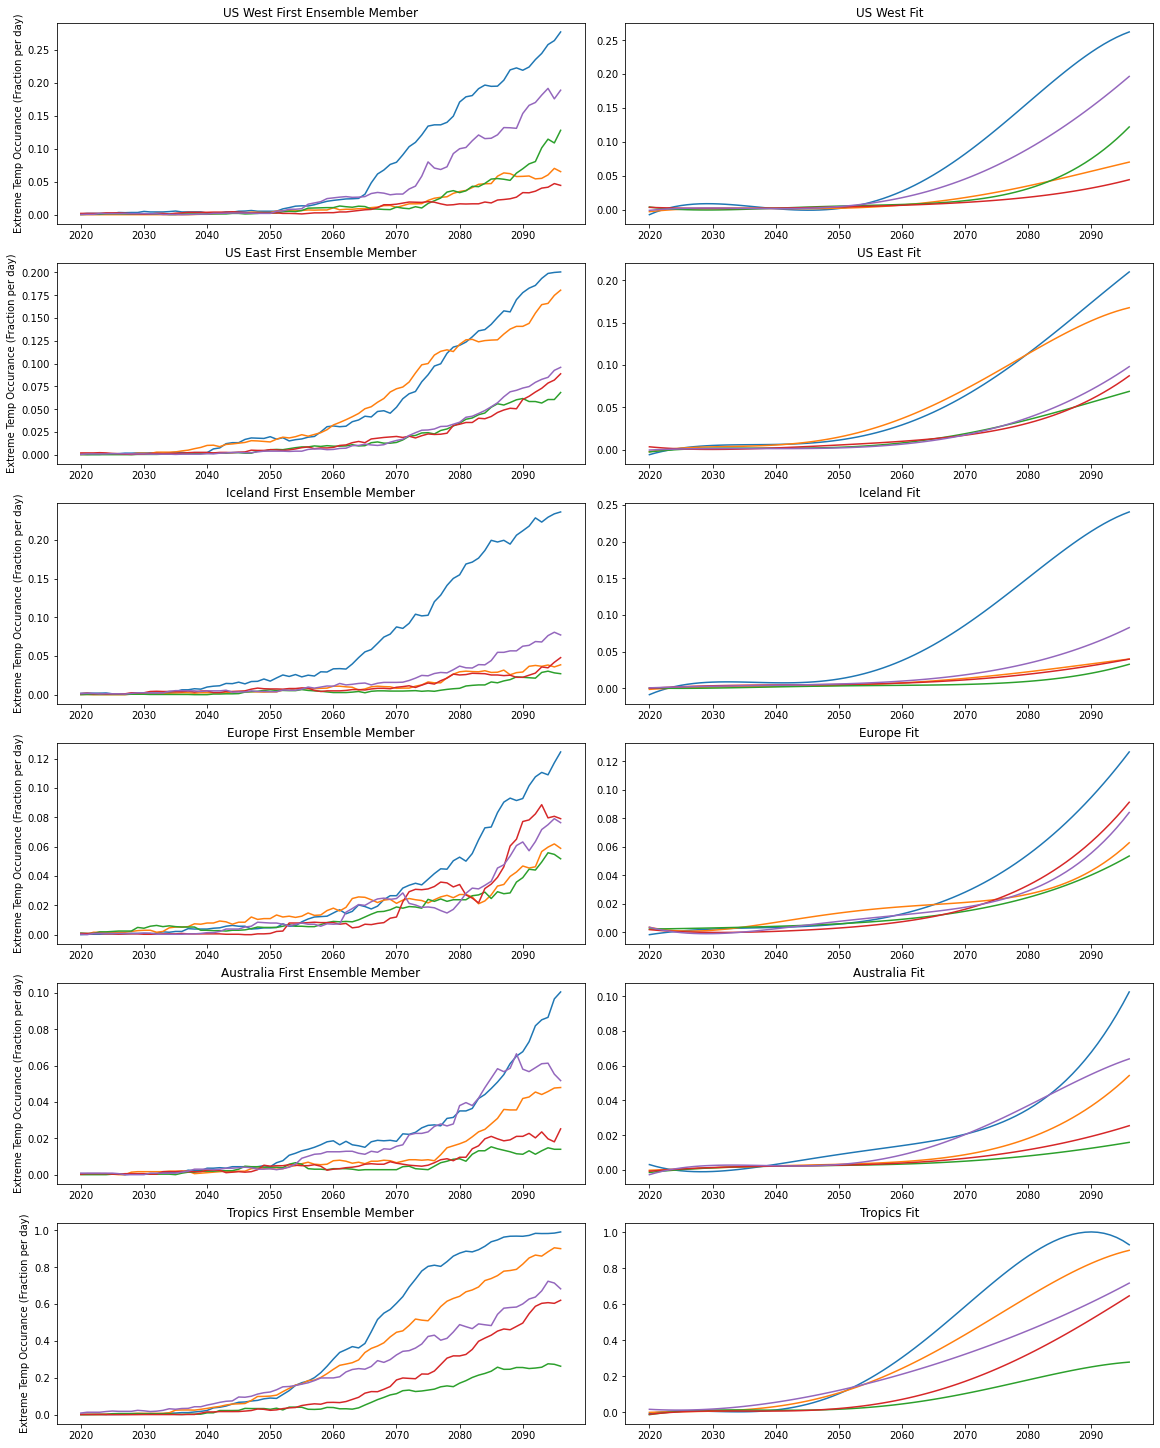

In [64]:
# plot data used for FIT method
variable='tasmin'
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West First Ensemble Member','US East First Ensemble Member',
          'Iceland First Ensemble Member','Europe First Ensemble Member',
          'Australia First Ensemble Member','Tropics First Ensemble Member']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin[variable+'_occurance'].sel(region=region).isel(model=m).isel(member=0))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

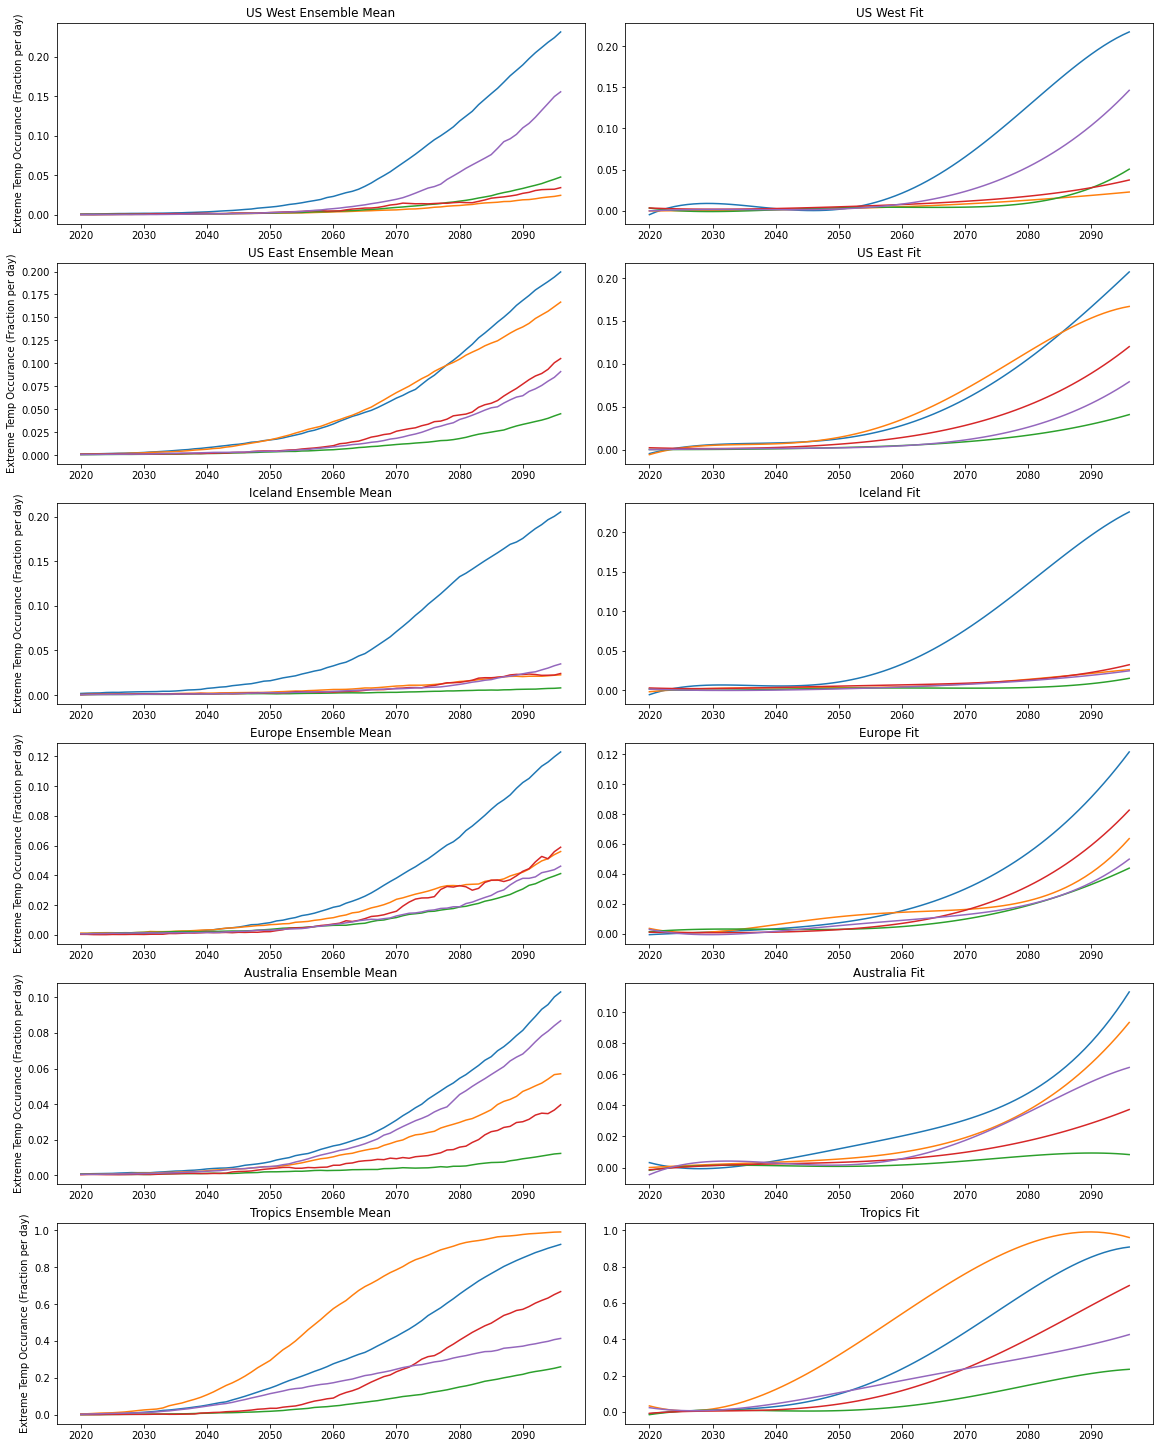

In [46]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West Ensemble Mean','US East Ensemble Mean',
          'Iceland Ensemble Mean','Europe Ensemble Mean',
          'Australia Ensemble Mean','Tropics Ensemble Mean']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tas.sel(region=region).time,internal_tas.sel(region=region).isel(model=m).tas_occurance.mean(dim='member'))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tas.sel(region=region).time,internal_tas.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

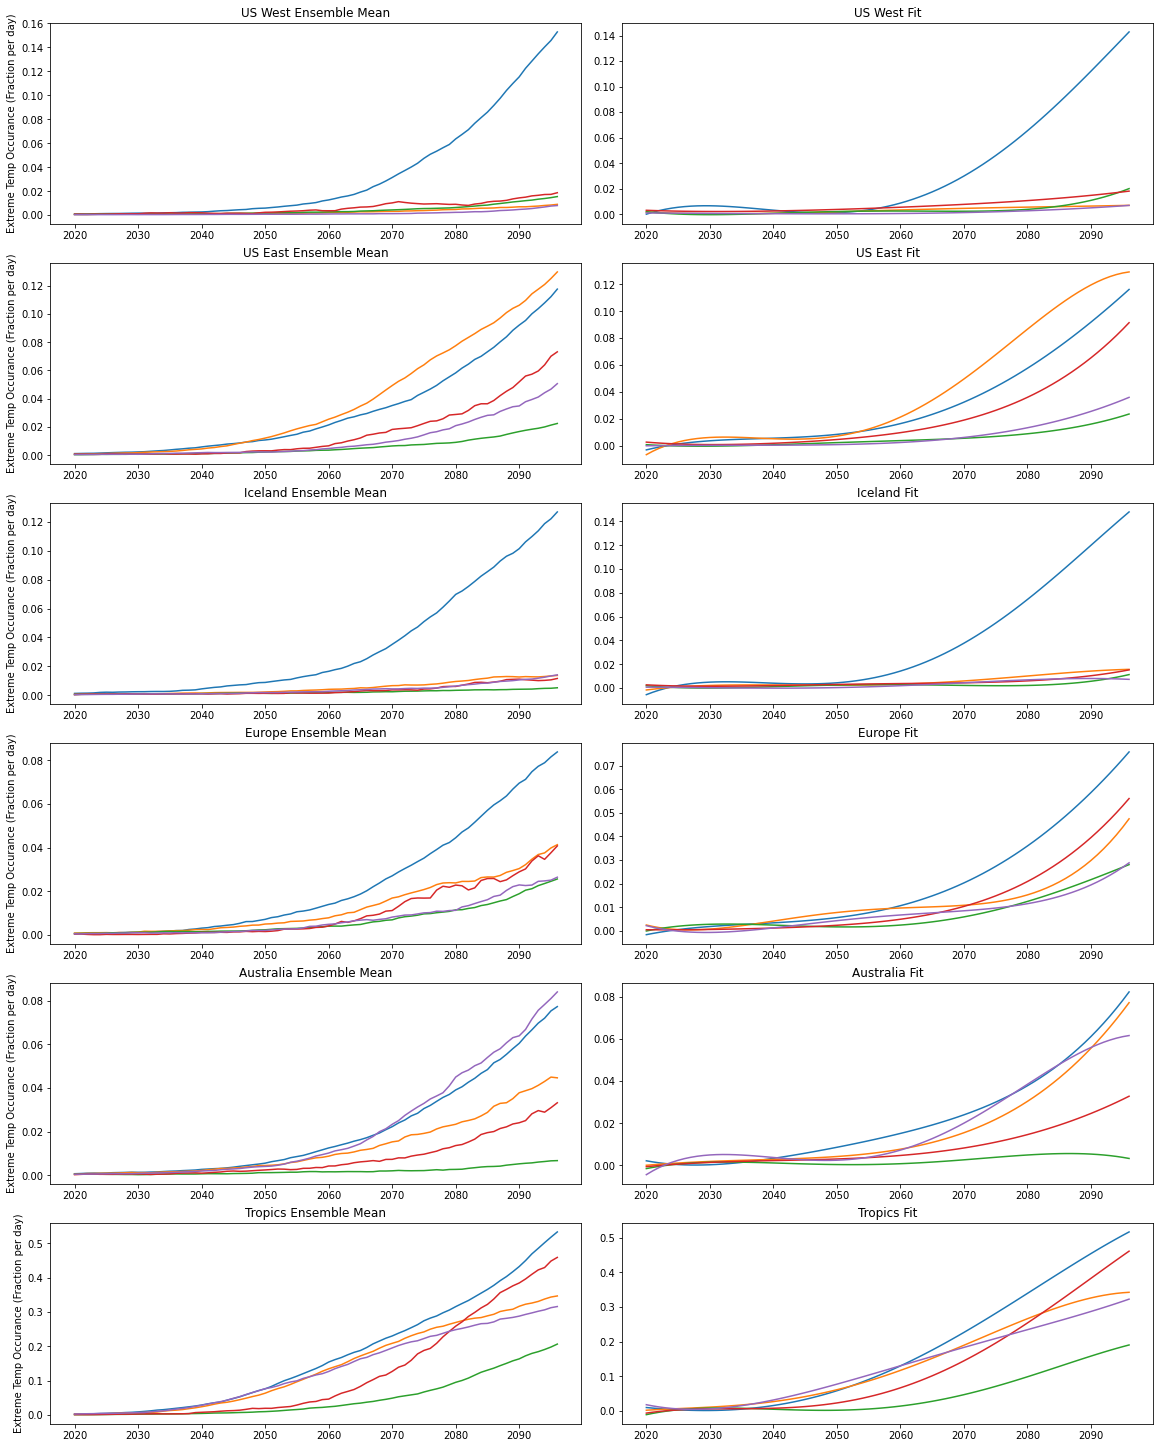

In [47]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West Ensemble Mean','US East Ensemble Mean',
          'Iceland Ensemble Mean','Europe Ensemble Mean',
          'Australia Ensemble Mean','Tropics Ensemble Mean']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax.sel(region=region).isel(model=m).tasmax_occurance.mean(dim='member'))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmax.sel(region=region).time,internal_tasmax.sel(region=region).isel(model=m).fit)
        axis.set_title(title)

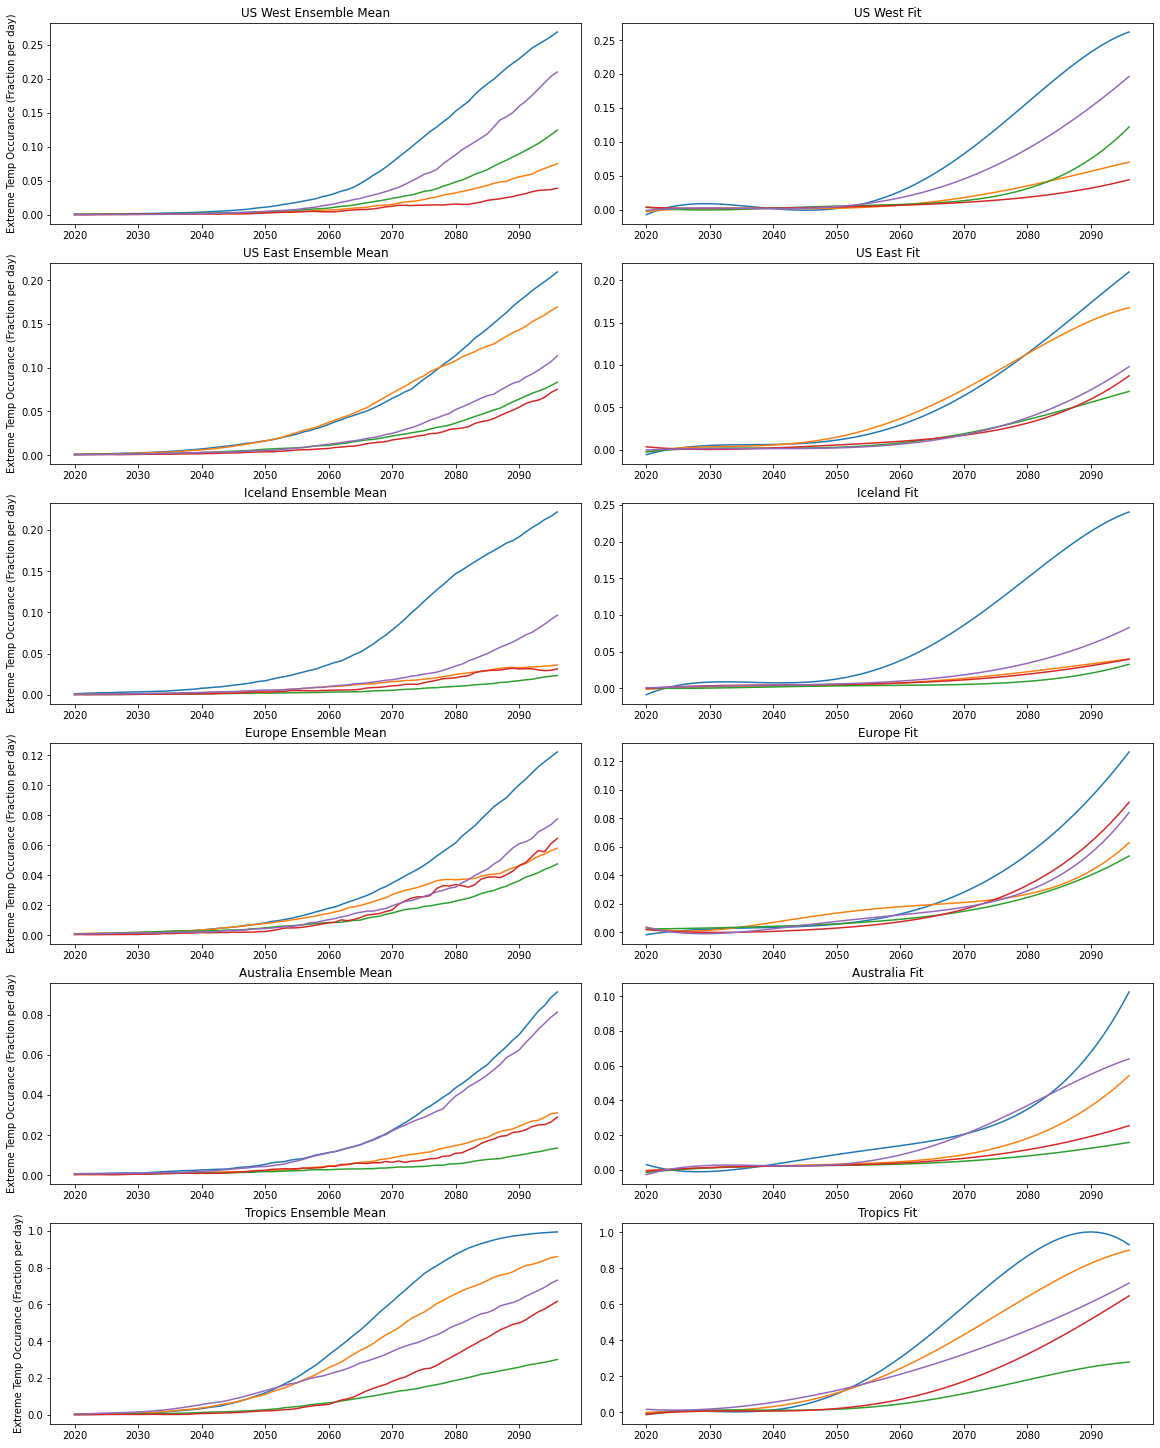

In [65]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,5,1)
regions = ['USwest','USeast','iceland','europe','australia','tropics']
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West Ensemble Mean','US East Ensemble Mean',
          'Iceland Ensemble Mean','Europe Ensemble Mean',
          'Australia Ensemble Mean','Tropics Ensemble Mean']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin.sel(region=region).isel(model=m).tasmin_occurance.mean(dim='member'))
        axis.set_title(title)
        axis.set_ylabel('Extreme Temp Occurance (Fraction per day)')
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(internal_tasmin.sel(region=region).time,internal_tasmin.sel(region=region).isel(model=m).fit)
        axis.set_title(title)